In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os


import keras
import tensorflow
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.layers.core import Dense, Activation, Dropout

from tensorflow.keras.layers import Embedding
from IPython.display import clear_output



%config InlineBackend.figure_format = 'retina'



plt.rcParams['figure.figsize']=[24,12]

Using TensorFlow backend.
/Users/hridoy/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/hridoy/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/hridoy/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/hridoy/anaconda3/lib/python3.7/site-packages/t

In [2]:
df= pd.read_csv('crypto.csv')

In [3]:
df.columns

Index(['date_time', 'compound', 'close'], dtype='object')

In [4]:
df

,date_time,compound,close
0,30/12/21 16:00,0.6369,3737.53
1,30/12/21 17:00,0.0947,3744.75
2,30/12/21 18:00,0.1983,3743.75
3,30/12/21 19:00,0.7684,3757.15
4,30/12/21 20:00,0.0000,3742.93
...,...,...,...
3327,18/5/22 7:00,0.1563,2027.95
3328,18/5/22 8:00,0.3537,2030.28
3329,18/5/22 9:00,-0.1430,2030.54
3330,18/5/22 10:00,0.0529,2039.97


In [5]:
#df=df.drop(['date_time',], axis=1)

In [6]:
df['date_time'] = pd.to_datetime(df['date_time'])

In [7]:
df

,date_time,compound,close
0,2021-12-30 16:00:00,0.6369,3737.53
1,2021-12-30 17:00:00,0.0947,3744.75
2,2021-12-30 18:00:00,0.1983,3743.75
3,2021-12-30 19:00:00,0.7684,3757.15
4,2021-12-30 20:00:00,0.0000,3742.93
...,...,...,...
3327,2022-05-18 07:00:00,0.1563,2027.95
3328,2022-05-18 08:00:00,0.3537,2030.28
3329,2022-05-18 09:00:00,-0.1430,2030.54
3330,2022-05-18 10:00:00,0.0529,2039.97


In [8]:
a=df['date_time'].values

In [9]:
a

array(['2021-12-30T16:00:00.000000000', '2021-12-30T17:00:00.000000000',
       '2021-12-30T18:00:00.000000000', ...,
       '2022-05-18T09:00:00.000000000', '2022-05-18T10:00:00.000000000',
       '2022-05-18T11:00:00.000000000'], dtype='datetime64[ns]')

In [10]:
X = df.drop(['close'],axis=1)
y = df.close

In [11]:
df

,date_time,compound,close
0,2021-12-30 16:00:00,0.6369,3737.53
1,2021-12-30 17:00:00,0.0947,3744.75
2,2021-12-30 18:00:00,0.1983,3743.75
3,2021-12-30 19:00:00,0.7684,3757.15
4,2021-12-30 20:00:00,0.0000,3742.93
...,...,...,...
3327,2022-05-18 07:00:00,0.1563,2027.95
3328,2022-05-18 08:00:00,0.3537,2030.28
3329,2022-05-18 09:00:00,-0.1430,2030.54
3330,2022-05-18 10:00:00,0.0529,2039.97


In [12]:
# Separate Target Variable and Predictor Variables
TargetVariable=['close']
Predictors=['compound' ]

X=df[Predictors].values
y=df[TargetVariable].values
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()
 
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)
 
# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)
 
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [14]:
print(X_train.shape)
print(X_test.shape)

(2665, 1, 1)
(667, 1, 1)


In [15]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

# fix random seed for reproducibility
np.random.seed(5)

# load the dataset
#df = read_csv(input_file, header=None, index_col=None, delimiter=',')

# take close price column[5]
all_y = df['close'].values
dataset=all_y.reshape(-1, 1)

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets, 50% test data, 50% training data
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1, timestep 240
look_back = 240
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# create and fit the LSTM network, optimizer=adam, 25 neurons, dropout 0.1
model = Sequential()
model.add(LSTM(25, input_shape=(1, look_back)))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam',metrics=['mse'])
history=model.fit(trainX, trainY, epochs=100, batch_size=64, verbose=1,validation_data=(testX, testY))


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 2091 samples, validate on 759 samples
Epoch 1/100
2091/2091 [==============================] - 0s - loss: 0.0380 - mean_squared_error: 0.0380 - val_loss: 0.0056 - val_mean_squared_error: 0.0056
Epoch 2/100
2091/2091 [==============================] - 0s - loss: 0.0113 - mean_squared_error: 0.0113 - val_loss: 0.0048 - val_mean_squared_error: 0.0048
Epoch 3/100
2091/2091 [==============================] - 0s - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.0036 - val_mean_squared_error: 0.0036
Epoch 4/100
2091/2091 [==============================] - 0s - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 5/100
2091/2091

2091/2091 [==============================] - 0s - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 7.9457e-04 - val_mean_squared_error: 7.9457e-04
Epoch 94/100
2091/2091 [==============================] - 0s - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 6.2378e-04 - val_mean_squared_error: 6.2378e-04
Epoch 95/100
2091/2091 [==============================] - 0s - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 7.1060e-04 - val_mean_squared_error: 7.1060e-04
Epoch 96/100
2091/2091 [==============================] - 0s - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0015 - val_mean_squared_error: 0.0015
Epoch 97/100
2091/2091 [==============================] - 0s - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 7.2276e-04 - val_mean_squared_error: 7.2276e-04
Epoch 98/100
2091/2091 [==============================] - 0s - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 5.7300e-04 - val_mean_squared_error: 5.7300e-04
Epoch 99/100
2091/2091 [=======

In [16]:
history.history

{'val_loss': [0.0056381489357902465,
  0.004797601745198867,
  0.003550548881997277,
  0.0022983227073299613,
  0.0015455042453002975,
  0.0017589844934450896,
  0.0011640218158935998,
  0.0011149787818595805,
  0.0012211990938429894,
  0.001047489109920885,
  0.0010781007273152118,
  0.0009455491987465634,
  0.0010711730727637544,
  0.0015899115140833285,
  0.0009601044584230099,
  0.0008874659737718091,
  0.0009320175972471458,
  0.0009284574381715087,
  0.0008862007496607329,
  0.0010185960852952087,
  0.0011268482348428884,
  0.000898211416653425,
  0.0009686136704149296,
  0.0011667686818095171,
  0.0007952075771869643,
  0.0014787415351273248,
  0.0012045965313099139,
  0.0006916167179848974,
  0.0011317973713512006,
  0.0009053509783034111,
  0.0006464208548027183,
  0.0007630137980354849,
  0.000825582213555027,
  0.0017885482188728938,
  0.0008916039397444316,
  0.000806746558361099,
  0.0007414403455871819,
  0.000739016571531271,
  0.001029101635693856,
  0.00115123303908957

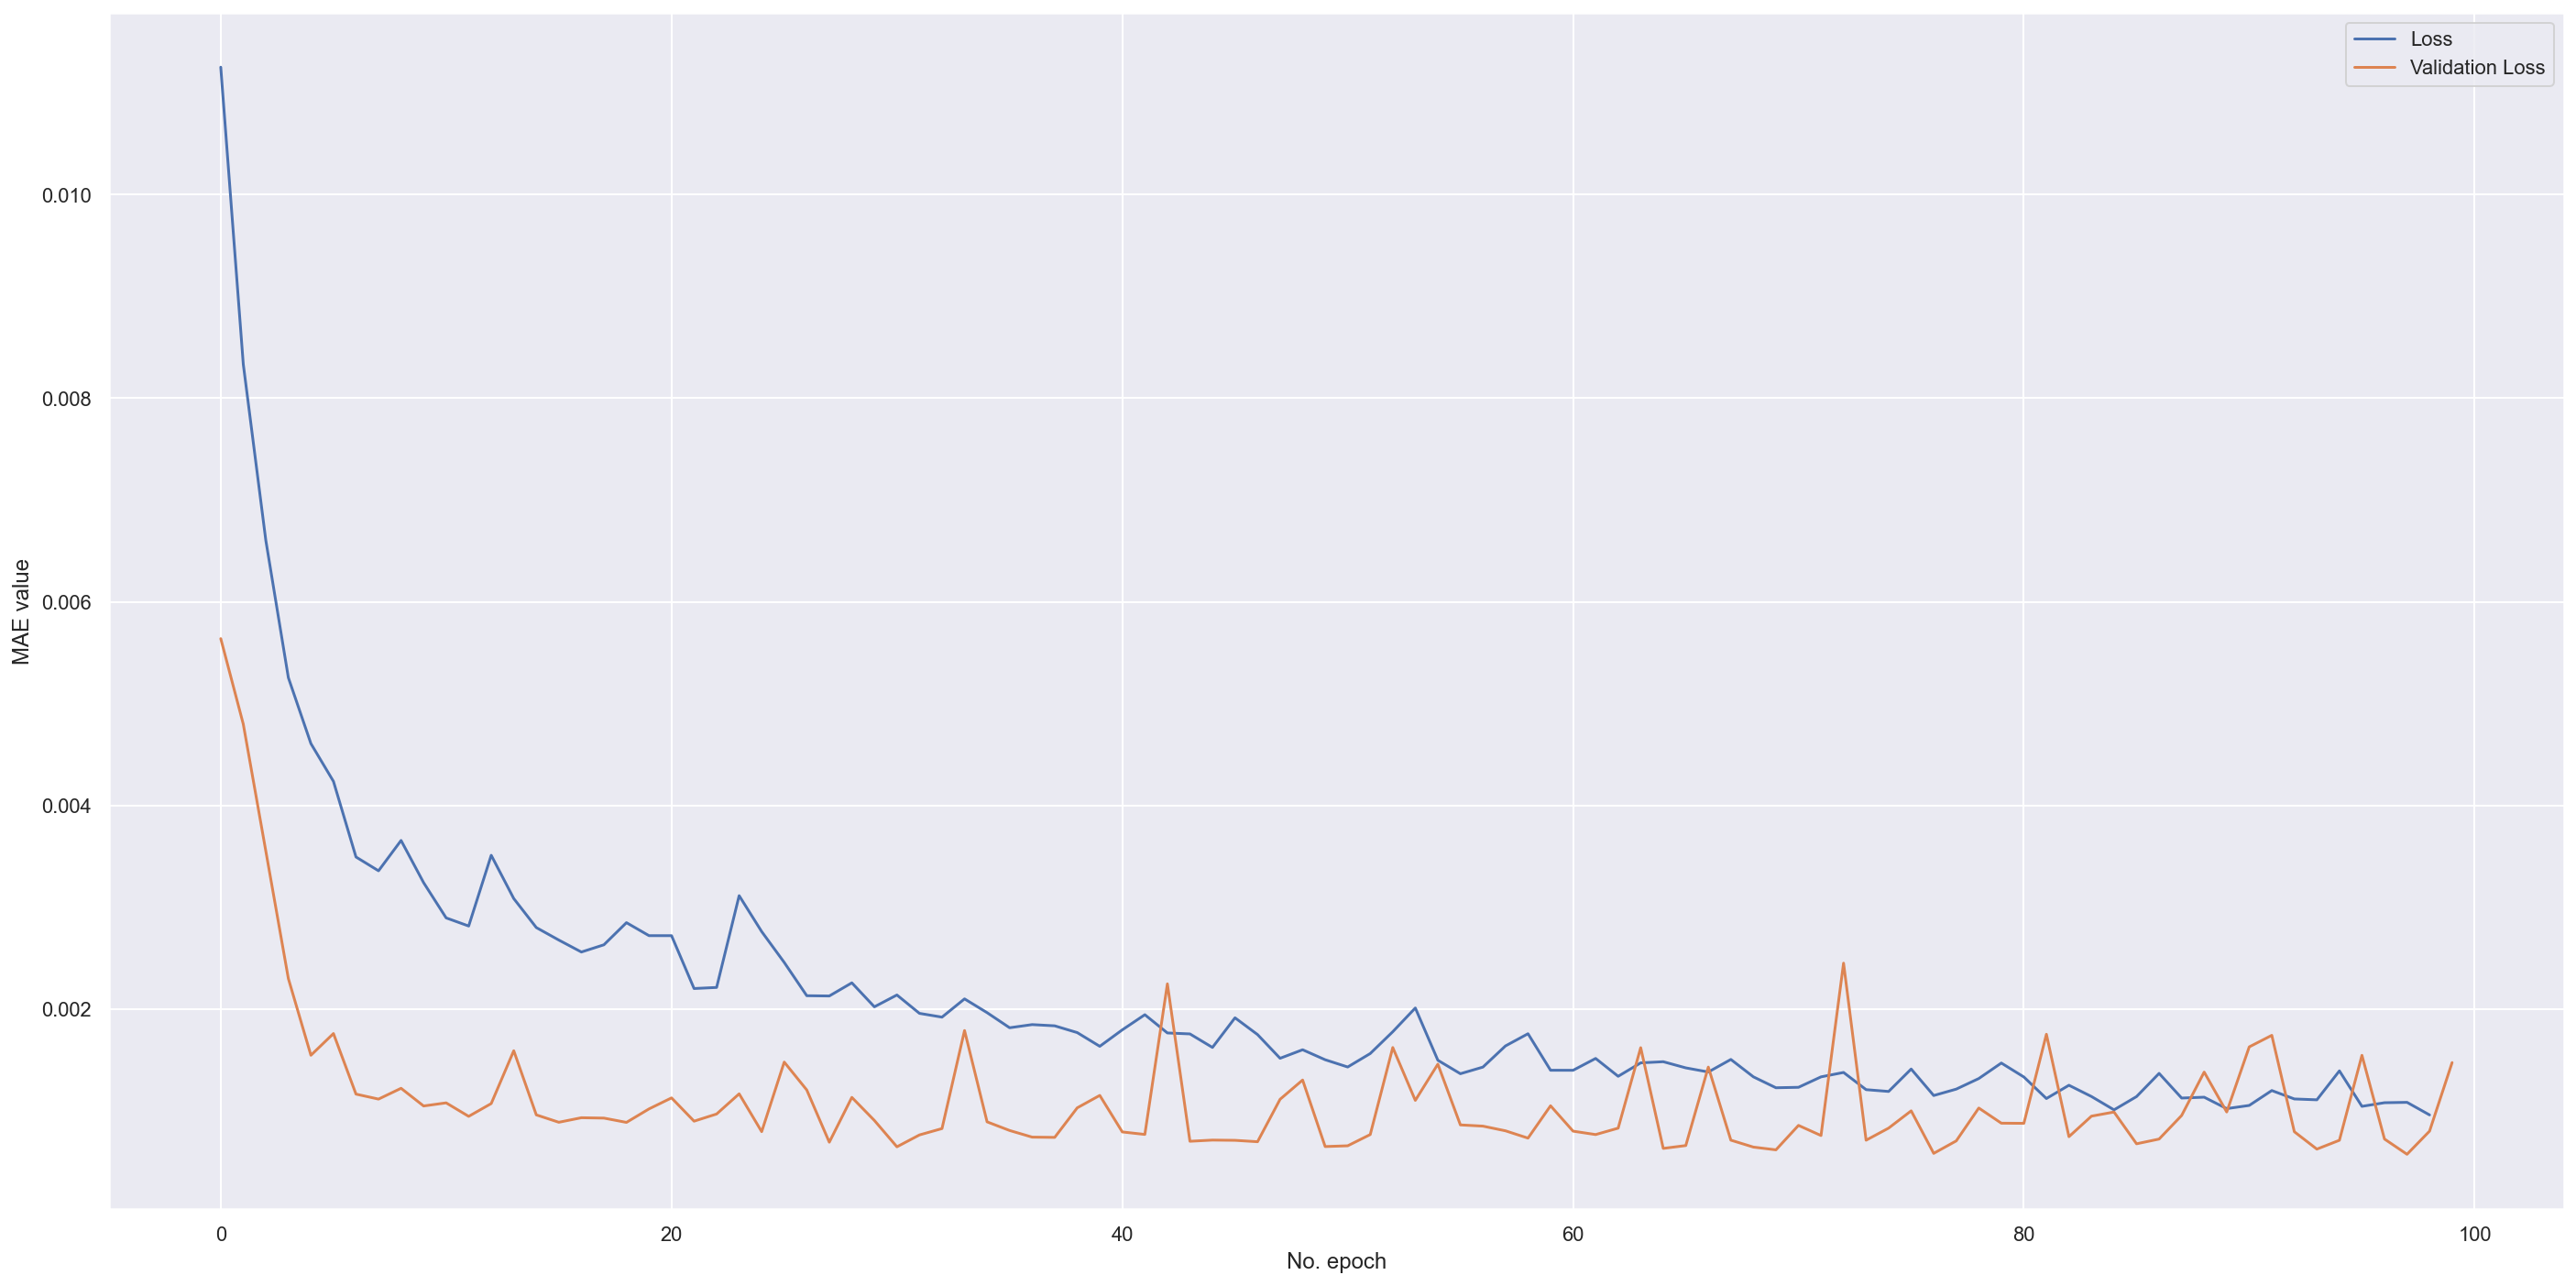

In [17]:
# Plot history: MAE
plt.plot(history.history['loss'][1:], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper right")
plt.show()

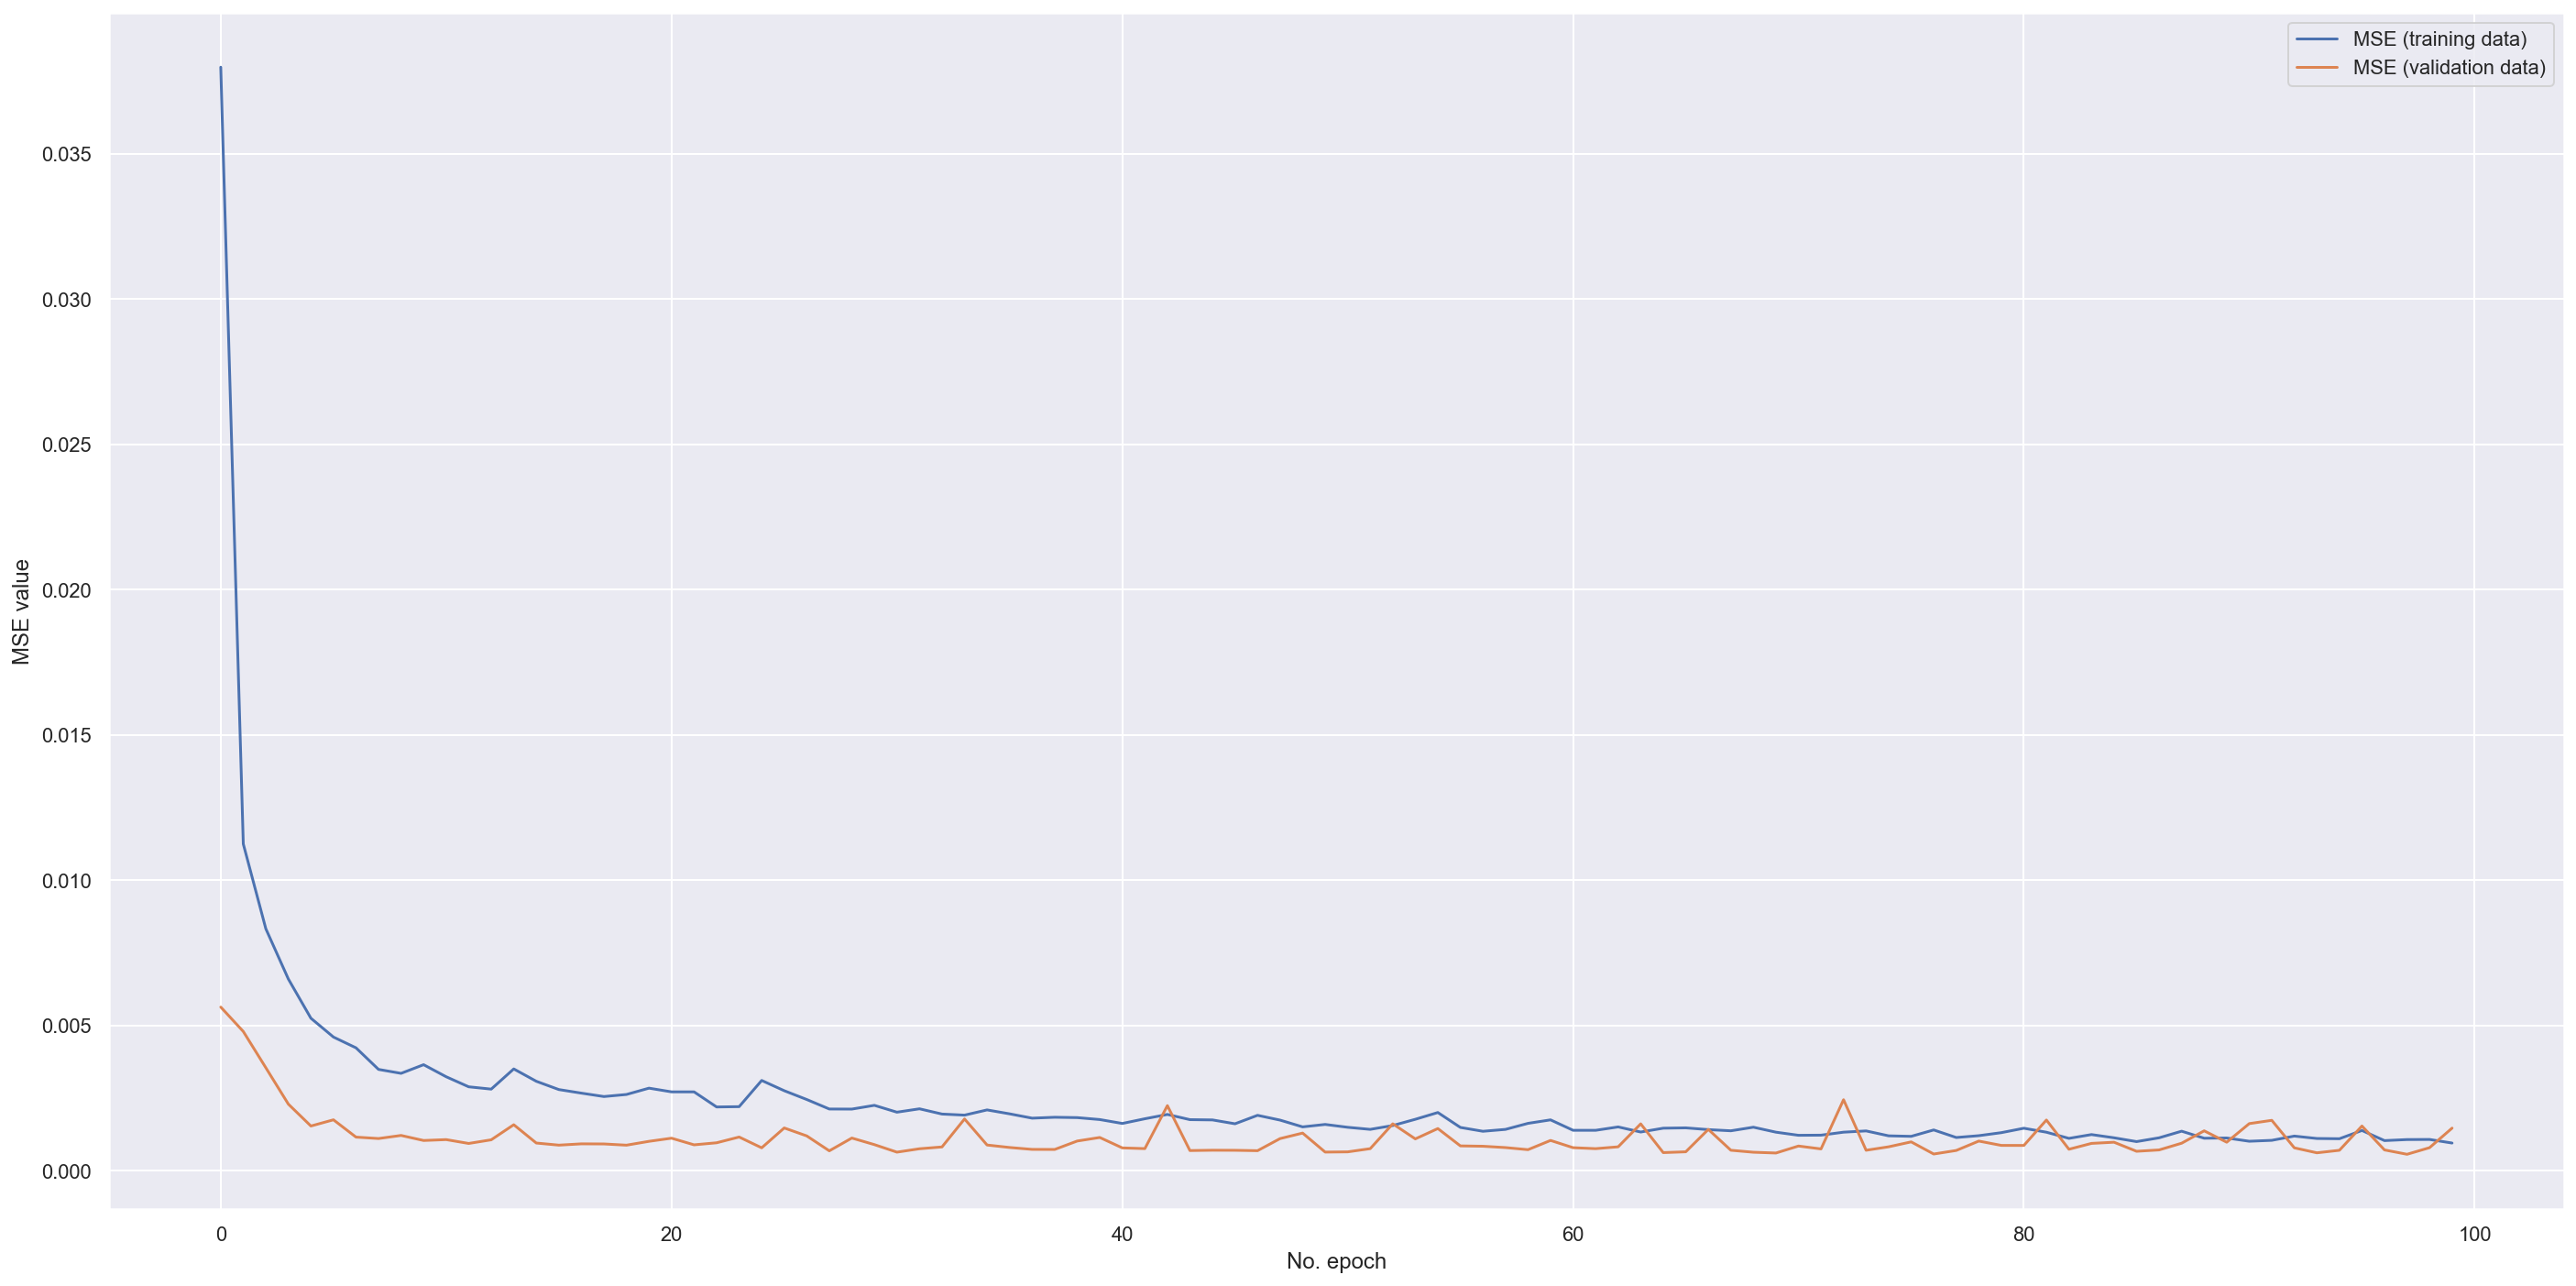

In [18]:
# Plot history: MSE
plt.plot(history.history['mean_squared_error'], label='MSE (training data)')
plt.plot(history.history['val_mean_squared_error'], label='MSE (validation data)')

plt.ylabel('MSE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper right")
plt.show()

In [19]:
pd.DataFrame(history.history)

,val_loss,val_mean_squared_error,loss,mean_squared_error
0,0.005638,0.005638,0.037978,0.037978
1,0.004798,0.004798,0.011251,0.011251
2,0.003551,0.003551,0.008333,0.008333
3,0.002298,0.002298,0.006602,0.006602
4,0.001546,0.001546,0.005254,0.005254
...,...,...,...,...
95,0.001545,0.001545,0.001392,0.001392
96,0.000723,0.000723,0.001044,0.001044
97,0.000573,0.000573,0.001079,0.001079
98,0.000800,0.000800,0.001083,0.001083


In [20]:
y_pred = model.predict(testX)



In [1]:
#y_pred

In [22]:
from math import sqrt
rmse = sqrt(mean_squared_error(y_pred, testY))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.038


In [23]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [2]:
#testY

In [25]:
testY = testY.reshape(1, -1)

In [26]:
testX = testX.reshape(1, -1)

In [27]:

# Scaling the predicted Price data back to original price scale
Predictions=TargetVarScalerFit.inverse_transform(y_pred)
 
# Scaling the y_test Price data back to original price scale
y_test_orig=TargetVarScalerFit.inverse_transform(testY)
 
# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(testX)

In [28]:
Test_Data=Test_Data.ravel()

In [29]:
Test_Data

array([0.30656625, 0.3074486 , 0.30527406, ..., 0.15710344, 0.15739546,
       0.15742805])

In [30]:
TestingData=pd.DataFrame()

In [31]:

TestingData['orginal'] = y_test_orig.ravel()
TestingData['predicted']= Predictions.ravel()
TestingData.head()

,orginal,predicted
0,3137.157748,3143.380371
1,3139.565608,3144.854980
2,3145.125127,3145.632324
3,3144.548303,3149.439209
4,3143.199219,3150.925293


In [32]:
len(a)

3332

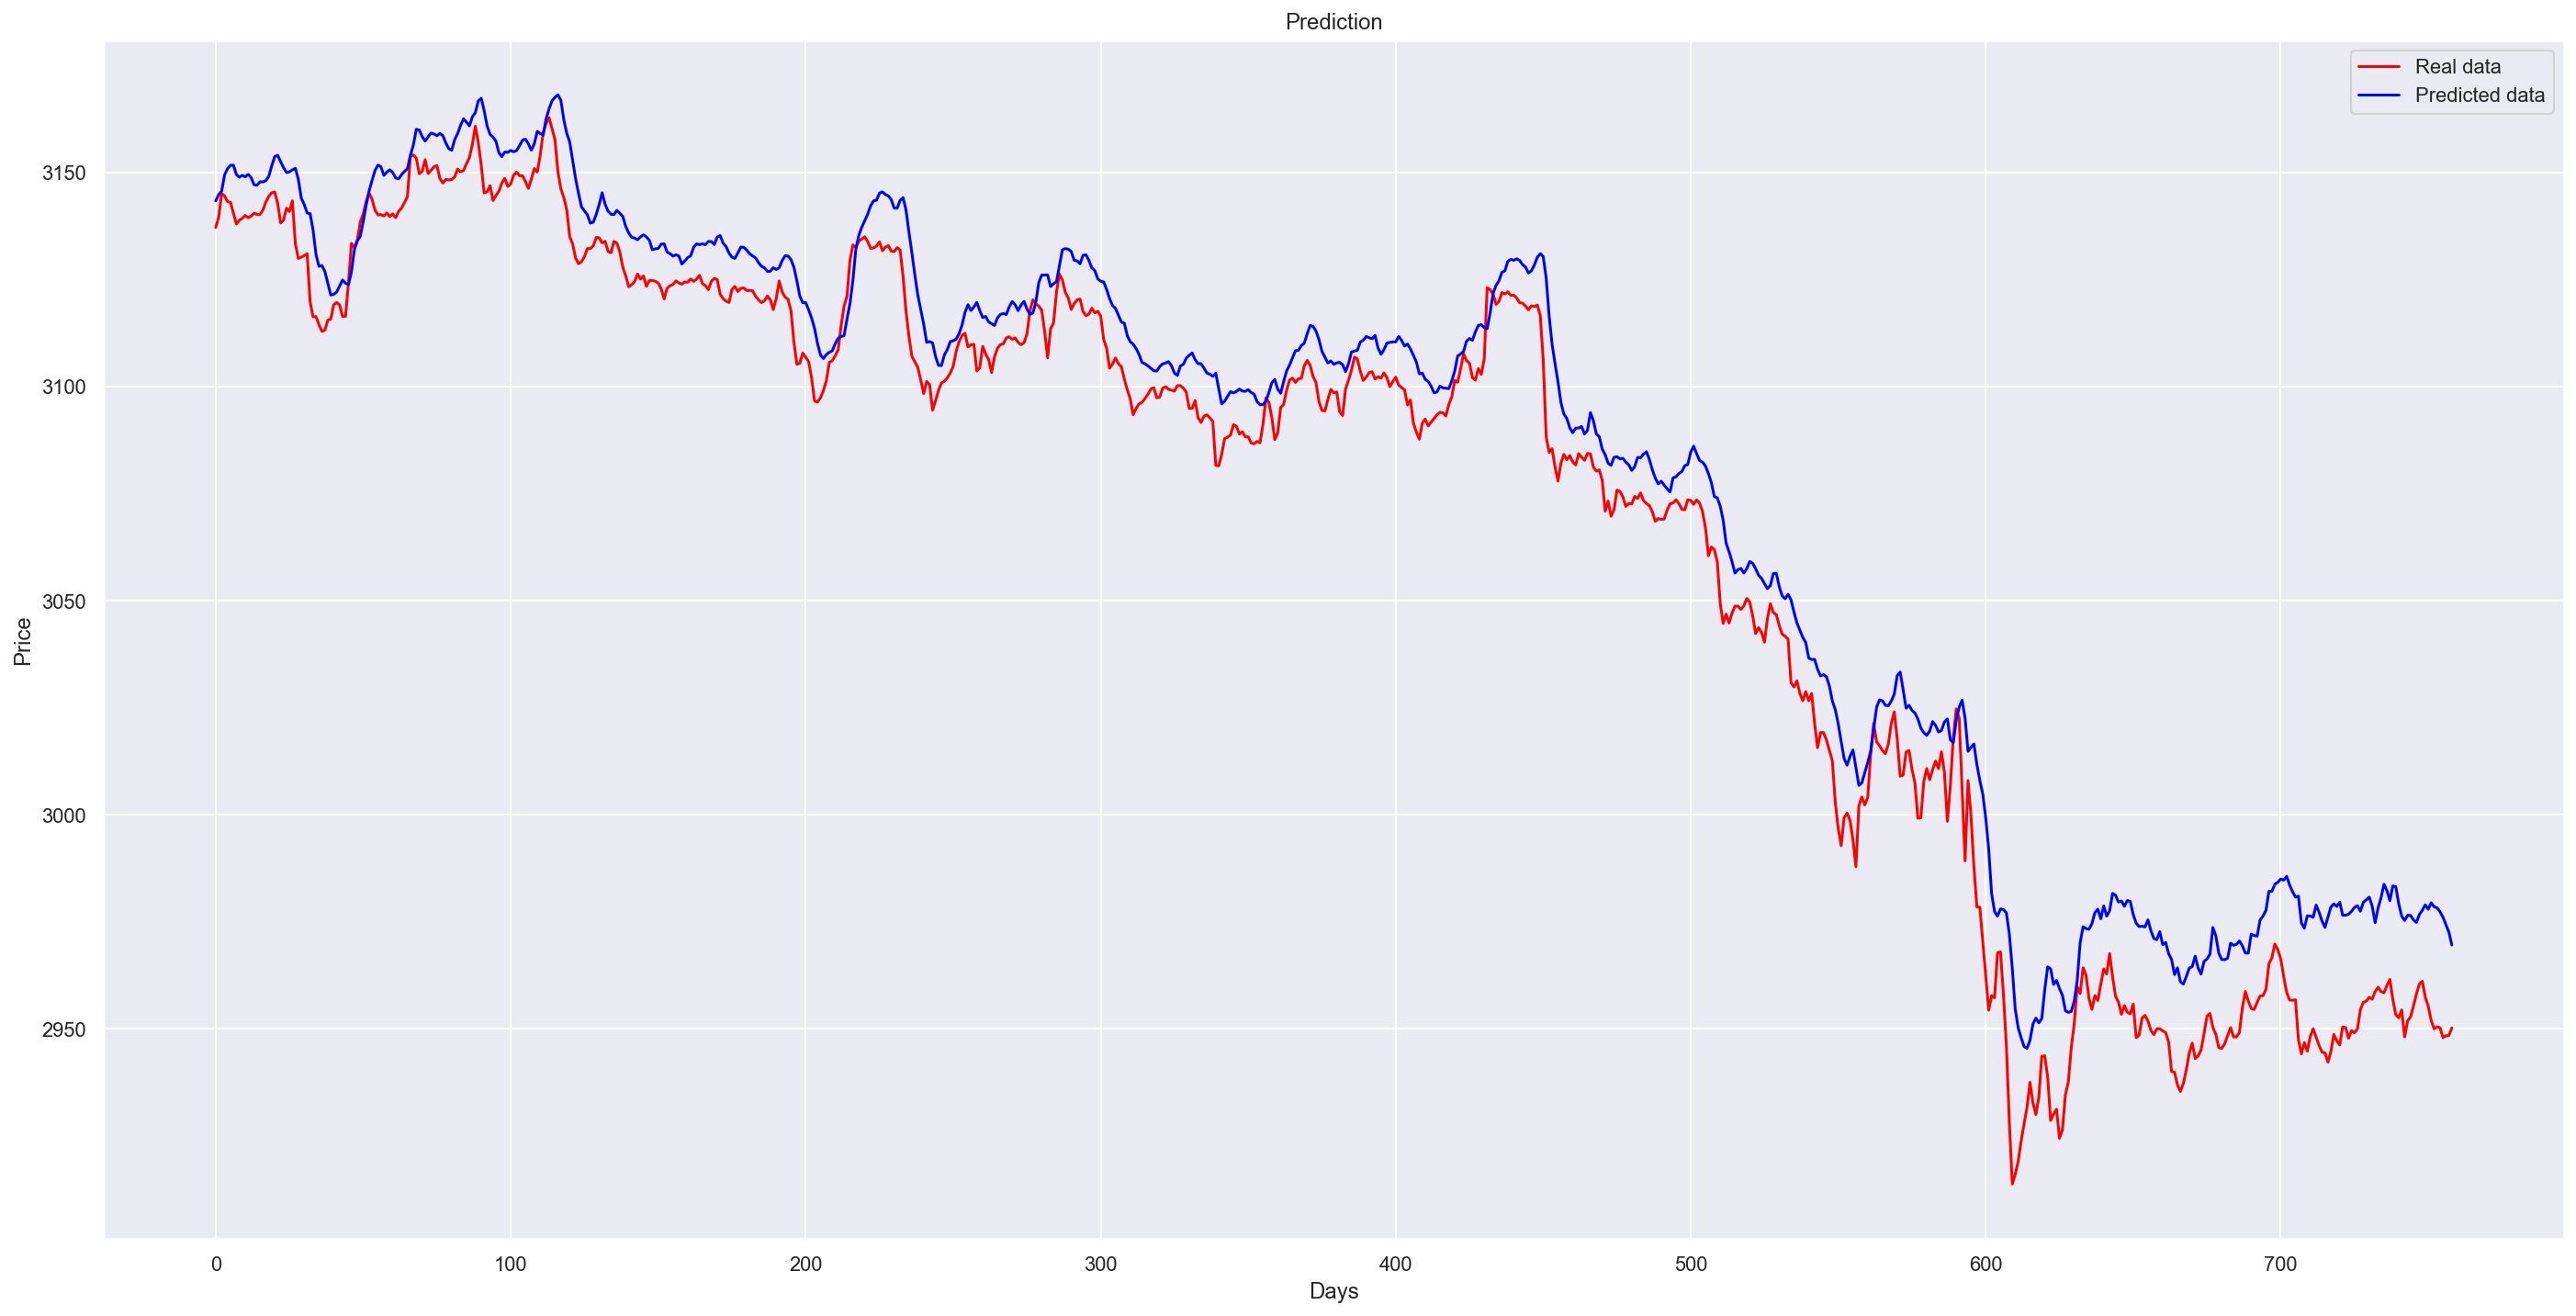

In [33]:


plt.plot(TestingData['orginal'], color = 'red', label = 'Real data')
plt.plot(TestingData['predicted'], color = 'blue', label = 'Predicted data')
plt.title('Prediction') 
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()

In [34]:
from math import sqrt
rmse = sqrt(mean_squared_error(TestingData['predicted'], TestingData['orginal']))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 14.707


In [35]:
from sklearn.metrics import r2_score
r_squared=r2_score(TestingData['orginal'], TestingData['predicted'])

In [36]:
r_squared

0.9569513843504172